# Loan Application MLP model

## Data Preparation and Pre-processing

In [ ]:
import pandas as pd

In [ ]:
train_ds = pd.read_excel("Loan_Application_Truncated.xlsx")

train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1570 non-null   int64  
 1   Decision      1570 non-null   int64  
 2   Selfcon_Code  1570 non-null   int64  
 3   Tier_1        1570 non-null   int64  
 4   Tier_2        1570 non-null   int64  
 5   AccoClass     1570 non-null   int64  
 6   LoanType      1570 non-null   int64  
 7   Gender        1570 non-null   int64  
 8   Etype         1570 non-null   int64  
 9   Doc_pf        1570 non-null   int64  
 10  Marstat       1570 non-null   int64  
 11  Emp_Type_1    1570 non-null   int64  
 12  Emp_Type_2    1570 non-null   int64  
 13  Emp_Type_3    1570 non-null   int64  
 14  Educlass_2    1570 non-null   int64  
 15  Educlass_1    1570 non-null   int64  
 16  Oriclass_1    1570 non-null   int64  
 17  Oriclass_2    1570 non-null   int64  
 18  eom_25        1570 non-null 

In [ ]:
len(train_ds)

1570

In [ ]:
train_ds.columns

Index(['ID', 'Decision', 'Selfcon_Code', 'Tier_1', 'Tier_2', 'AccoClass',
       'LoanType', 'Gender', 'Etype', 'Doc_pf', 'Marstat', 'Emp_Type_1',
       'Emp_Type_2', 'Emp_Type_3', 'Educlass_2', 'Educlass_1', 'Oriclass_1',
       'Oriclass_2', 'eom_25', 'OldEmi_d', 'BankSave_d', 'Age', 'YrsAdd',
       'YrsJob', 'DispInc', 'MarVal', 'OldEmi', 'LoanReq', 'Term', 'Dwnpay',
       'BankSave', 'CalcEmi', 'IIR', 'IAR', 'FOIR', 'LTV', 'LVR',
       'dwnp_prop_p'],
      dtype='object')

In [ ]:
# Setting up Independent and Dependent Variable

X = train_ds.iloc[:, 2:]
y = train_ds.iloc[:, 1]

In [ ]:
num_inputs = X.shape[1]

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 0)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

## Model Building - Grid Search using Scikit-learn

In [ ]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2,l1

# Function to build a Keras Model
def build_classifier(hidden_layers = [50], dropout_rate = 0.3,
                     regularization_type = l1, regularization_factor = 0.1, 
                     optimizer = 'adam', num_inputs = 36):
 
  model = Sequential()
  for layers in hidden_layers:   
    model.add(Dense(units = layers, input_dim = num_inputs, activation="relu", 
                    kernel_regularizer = regularization_type(regularization_factor)))
    model.add(BatchNormalization())
    model.add(Dropout(rate = dropout_rate))

  model.add(Dense(activation="sigmoid", units=1))
  
  model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model 

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

classifier = KerasClassifier(
    build_fn = build_classifier, num_inputs = num_inputs, batch_size = 100)

parameters = {'regularization_type' : [l1,l2],
              'regularization_factor' : [0.01, 0.1],
              'dropout_rate' : [0.3, 0.5],          
              'optimizer': ['adam', 'sgd']}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

In [ ]:
grid_search = grid_search.fit(X_train, y_train, epochs=10)

Epoch 1/10
12/12 [==============================] - 0s 4ms/step - loss: 3.1741 - accuracy: 0.5310
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 2.9588 - accuracy: 0.5690
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 2.7708 - accuracy: 0.5982
Epoch 4/10
12/12 [==============================] - 0s 4ms/step - loss: 2.6008 - accuracy: 0.6310
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 2.4273 - accuracy: 0.6602
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 2.2988 - accuracy: 0.6876
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 2.1494 - accuracy: 0.7018
Epoch 8/10
12/12 [==============================] - 0s 4ms/step - loss: 2.0074 - accuracy: 0.7257
Epoch 9/10
12/12 [==============================] - 0s 4ms/step - loss: 1.8844 - accuracy: 0.7407
Epoch 10/10
12/12 [==============================] - 0s 4ms/step - loss: 1.7552 - accuracy: 0.7504
Instructions for up

In [ ]:
best_parameters = grid_search.best_params_
best_parameters

{'dropout_rate': 0.3,
 'optimizer': 'adam',
 'regularization_factor': 0.01,
 'regularization_type': <function tensorflow.python.keras.regularizers.l1>}

## MLP model with best parameters

In [ ]:
# Initialising the MLP
classifier = Sequential()

In [ ]:
classifier.add(Dense(input_dim=36, activation="relu", units=50, kernel_regularizer=l1(0.1)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

In [ ]:
# Output Layer
classifier.add(Dense(activation="sigmoid", units=1))

In [ ]:
# Model Summary

classifier.summary()

In [ ]:
# Compiling and Fitting the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
hist = classifier.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = 100, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 22ms/step - loss: 23.5099 - accuracy: 0.5175 - val_loss: 22.0896 - val_accuracy: 0.5096
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 21.2686 - accuracy: 0.5295 - val_loss: 19.8983 - val_accuracy: 0.5764
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 19.1353 - accuracy: 0.5533 - val_loss: 17.8346 - val_accuracy: 0.6401
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 17.1034 - accuracy: 0.6043 - val_loss: 15.8869 - val_accuracy: 0.7420
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 15.1863 - accuracy: 0.6290 - val_loss: 14.0586 - val_accuracy: 0.7834
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 13.4164 - accuracy: 0.6465 - val_loss: 12.3451 - val_accuracy: 0.7803
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 11.7346 - accuracy: 0.6736 - val_loss: 10.7354 - val_accuracy: 0.812

In [ ]:
# Predicting the Validation set results
y_pred = classifier.predict(X_valid)
y_pred = (y_pred > 0.7)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

conf_mat = confusion_matrix(y_valid, y_pred)
conf_mat

array([[ 13,  50],
       [  1, 250]])

In [ ]:
print('Accuracy: {0}%'.format(accuracy_score(y_valid, y_pred) * 100))

Accuracy: 83.7579617834395%


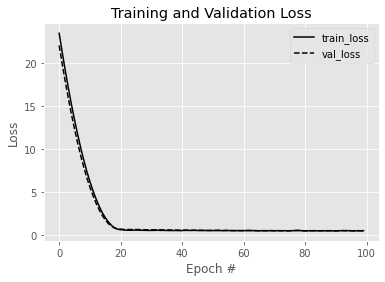

In [ ]:
# plot the training and validation loss

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(np.arange(0, 100), hist.history["loss"], label="train_loss", color='black' )
plt.plot(np.arange(0, 100), hist.history["val_loss"], label="val_loss", color='black', linestyle='--')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

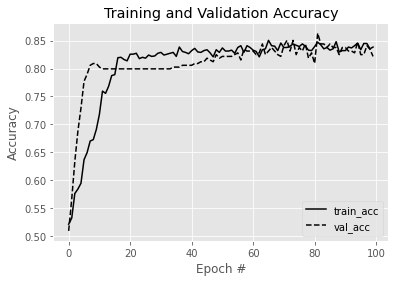

In [ ]:
# plot the training and validation accuracy

plt.style.use('ggplot')
plt.plot(np.arange(0, 100), hist.history["accuracy"], label="train_acc", color='black')
plt.plot(np.arange(0, 100), hist.history["val_accuracy"], label="val_acc", color='black', linestyle='--')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()